# Librerias

In [1]:
import sys
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Get the absolute path of the project root (modify if needed)
project_root = os.path.abspath(r"C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction")

# Add the project root to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar el módulo
from src import visualizations

# Recargar el módulo después de modificarlo
importlib.reload(visualizations)

# Ahora puedes volver a usar las funciones actualizadas
from src.visualizations import plot_distribution_by_category,plot_correlation_by_category
from src.tools import categorizar_tipos_basicos, categorizar_tipos_detallados, crosstab_percentages

# Download Data

In [54]:
import kagglehub
import shutil
import os

# Download the latest version
dataset_handle = "ethicalstar/loan-prediction"
path = kagglehub.dataset_download(dataset_handle)

# Define the desired download directory
download_directory = r"C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction\data"

# Ensure the download directory exists
os.makedirs(download_directory, exist_ok=True)

# Move the dataset to the desired directory
shutil.move(path, download_directory)

print("Dataset moved to:", os.path.join(download_directory, os.path.basename(path)))


100%|██████████| 4.59M/4.59M [00:00<00:00, 19.7MB/s]

Extracting files...


Error: Destination path 'C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction\data\1' already exists

# Read the dataset

In [2]:
path_data="..//data/1/Loan Prediction.csv"
df=pd.read_csv(path_data)
# Convert Risk_Flag to categorical 1 = Hogh Risk, 0 = Low Risk
df['Risk_Flag'] = df['Risk_Flag'].astype('category')
df['Risk_Flag'] = df['Risk_Flag'].cat.rename_categories({1: 'High Risk', 0: 'Low Risk'})
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,Low Risk
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,Low Risk
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,Low Risk
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,High Risk
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,High Risk


In [ ]:
categorizar_tipos_basicos(df)

In [ ]:
categorizar_tipos_detallados(df)

In [159]:
print(df.shape)
df.dtypes

(252000, 13)


Id                      int64
Income                  int64
Age                     int64
Experience              int64
Married/Single         object
House_Ownership        object
Car_Ownership          object
Profession             object
CITY                   object
STATE                  object
CURRENT_JOB_YRS         int64
CURRENT_HOUSE_YRS       int64
Risk_Flag            category
dtype: object

In [4]:
# Select integer and float columns
df_num = df.select_dtypes(include=['int64', 'float64'])
#Delete Id column
df_num = df_num.drop(columns=['Id'])
# Create age groups column
df_num['Age_Group'] = pd.cut(df_num['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

df_num.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Age_Group
0,1303834,23,3,3,13,20-30
1,7574516,40,10,9,13,30-40
2,3991815,66,4,4,10,60-70
3,6256451,41,2,2,12,40-50
4,5768871,47,11,3,14,40-50


In [161]:
# Check NaN values
print(df_num.isnull().sum())
#Chech 0 values
print(df_num.isin([0]).sum())

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Age_Group            0
dtype: int64
Income                   0
Age                      0
Experience           11043
CURRENT_JOB_YRS      11043
CURRENT_HOUSE_YRS        0
Age_Group                0
dtype: int64


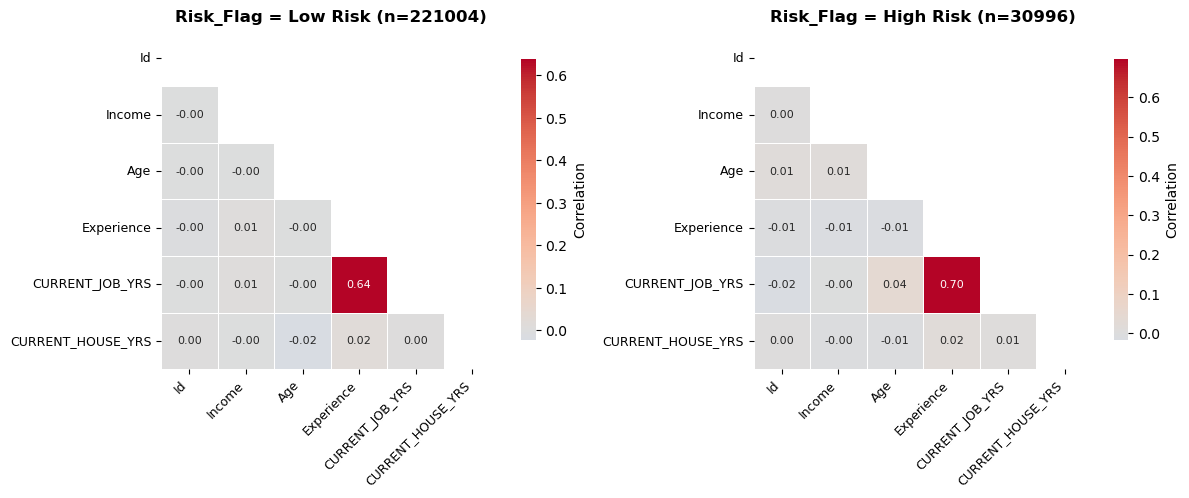

In [163]:
#Excluid last column
# plot_distribution_by_category(df_num.drop(columns=['Risk_Flag']), categorical_col="Age_Group", max_cols=3)
plot_correlation_by_category(df, categorical_col="Risk_Flag", max_cols=2)

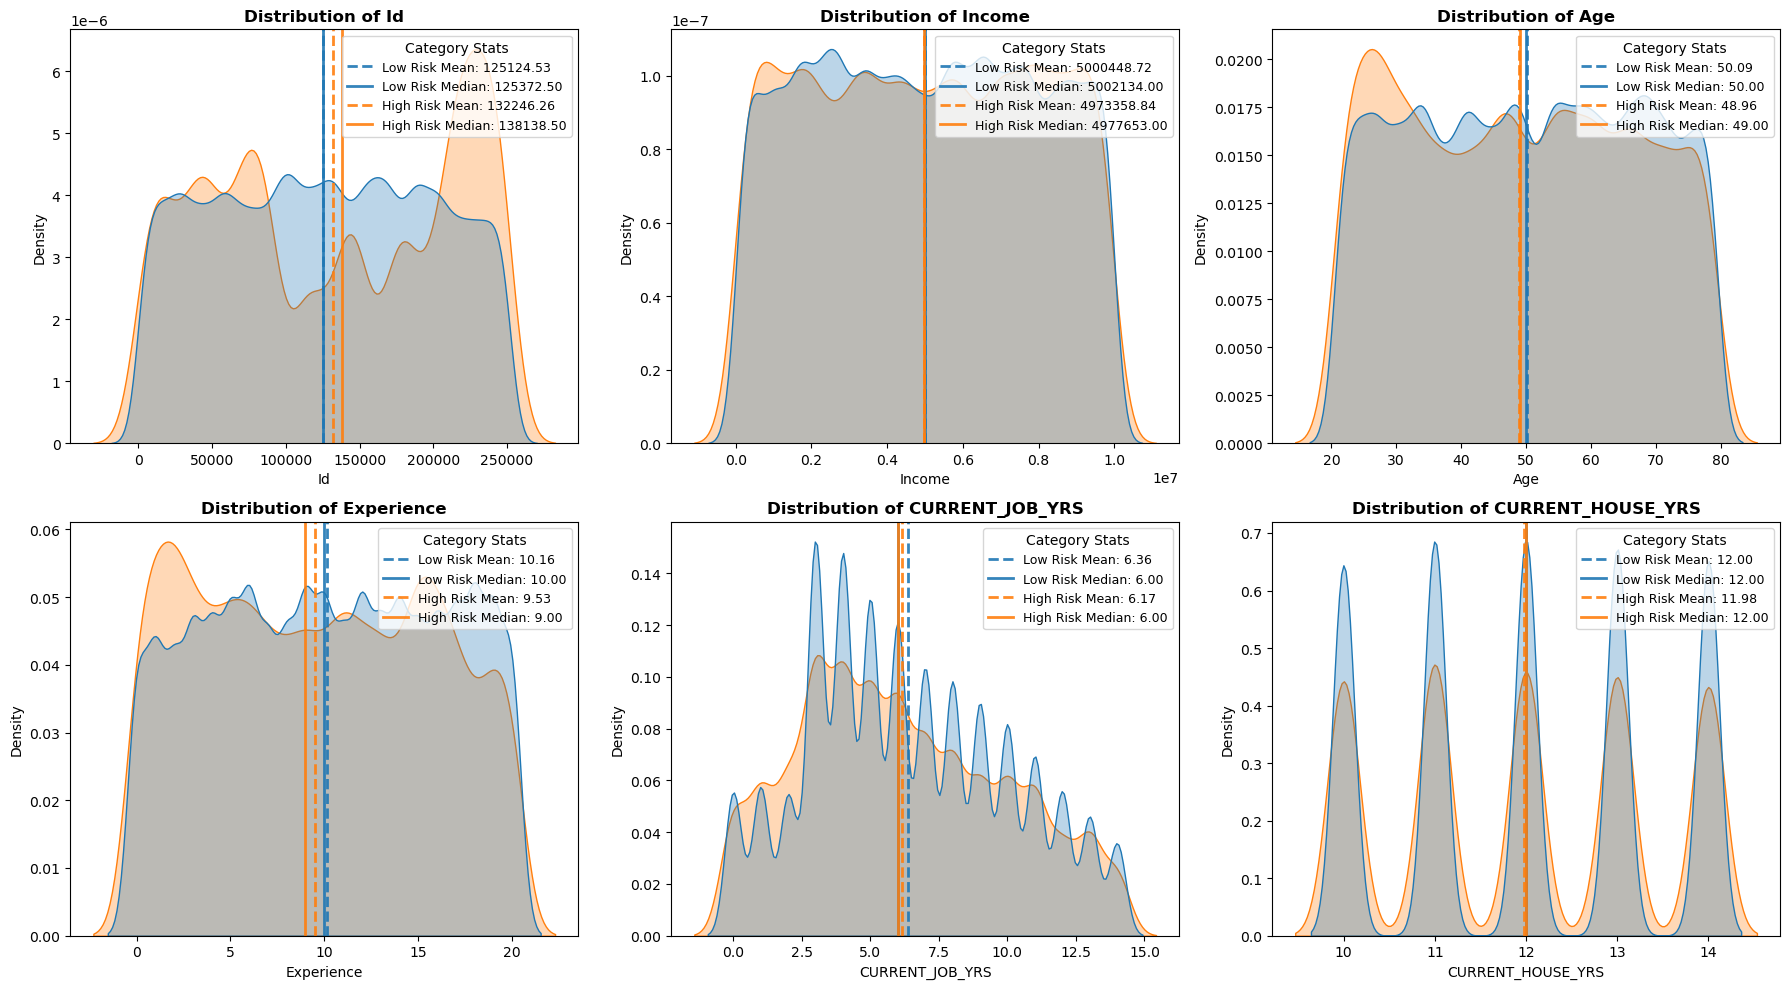

In [155]:
plot_distribution_by_category(df, categorical_col="Risk_Flag", max_cols=3, show_stats=True)

# Categorical Variables

In [5]:
# Select object columns
df_obj = df.select_dtypes(include=['object'])
df_obj.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [6]:
obj_list= df_obj.columns
for obj in obj_list:
    print(obj)
    print(df_obj[obj].unique())


Married/Single
['single' 'married']
House_Ownership
['rented' 'norent_noown' 'owned']
Car_Ownership
['no' 'yes']
Profession
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
CITY
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jal

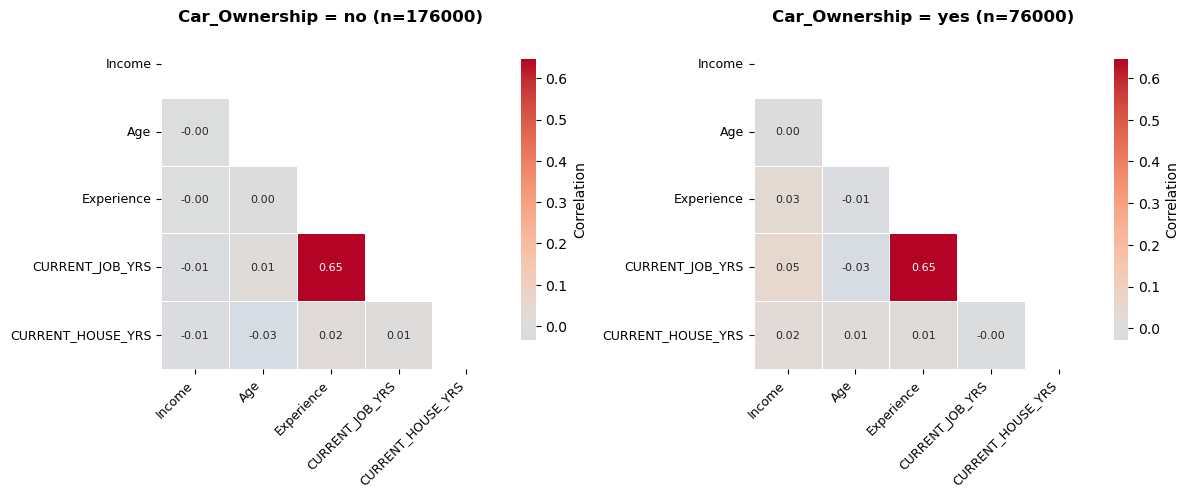

In [170]:
plot_correlation_by_category(df.drop(columns=['Id','Risk_Flag']), 'Car_Ownership', max_cols=2)

In [26]:
obj_list

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [29]:
# Cross table Risk_Flag and obj_list= df_obj.columns -- # index, columns,all,
for obj in obj_list:
    print(crosstab_percentages(df, obj, "Risk_Flag", normalize='index'))
    print("-------")

Risk_Flag        Low Risk  High Risk
Married/Single                      
married         89.754353  10.245647
single          87.466412  12.533588
Total           87.700000  12.300000
-------
Risk_Flag         Low Risk  High Risk
House_Ownership                      
norent_noown     90.047327   9.952673
owned            91.020282   8.979718
rented           87.442324  12.557676
Total            87.700000  12.300000
-------
Risk_Flag       Low Risk  High Risk
Car_Ownership                      
no             87.181250  12.818750
yes            88.901316  11.098684
Total          87.700000  12.300000
-------
Risk_Flag                    Low Risk  High Risk
Profession                                      
Air_traffic_controller      86.460898  13.539102
Analyst                     87.853470  12.146530
Architect                   86.879966  13.120034
Army_officer                84.788672  15.211328
Artist                      87.739148  12.260852
Aviator                     86.506936  1

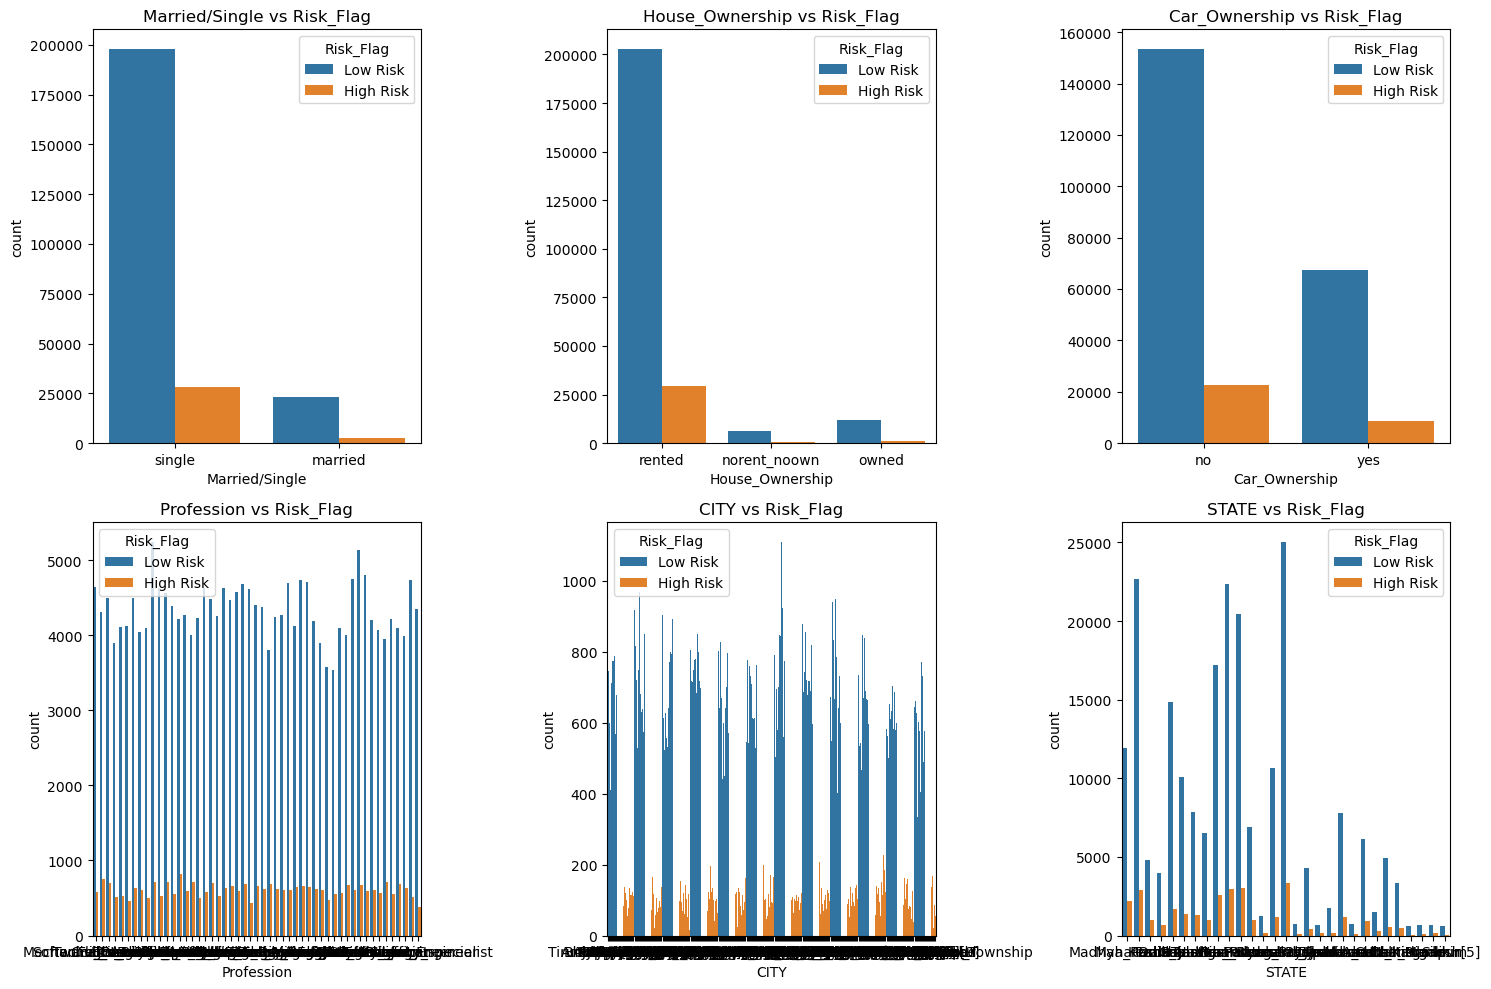

In [20]:
num_plots = len(obj_list)
num_cols = 3  # Set the number of columns you want
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, obj in enumerate(obj_list):
    sns.countplot(data=df, x=obj, hue='Risk_Flag', ax=axes[i])
    axes[i].set_title(f'{obj} vs Risk_Flag')

# Remove any unused subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
print(df.dtypes)
df.head()

Id                      int64
Income                  int64
Age                     int64
Experience              int64
Married/Single       category
House_Ownership      category
Car_Ownership        category
Profession           category
CITY                 category
STATE                category
CURRENT_JOB_YRS         int64
CURRENT_HOUSE_YRS       int64
Risk_Flag            category
dtype: object


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,Low Risk
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,Low Risk
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,Low Risk
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,High Risk
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,High Risk


In [32]:
# Obj to category: Married/Single	House_Ownership Car_Ownership Profession CITY STATE columns
df['Married/Single'] = df['Married/Single'].astype('category')
df['House_Ownership'] = df['House_Ownership'].astype('category')
df['Car_Ownership'] = df['Car_Ownership'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['CITY'] = df['CITY'].astype('category')
df['STATE'] = df['STATE'].astype('category')


In [35]:
# Show all categories with its codes
print(df['Married/Single'].cat.categories)
print(df['House_Ownership'].cat.categories)

Index(['married', 'single'], dtype='object')
Index(['norent_noown', 'owned', 'rented'], dtype='object')


# Create new Variables

In [ ]:
# Create Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])


In [1]:
sns.histplot(df['Income'], kde=True)

NameError: name 'sns' is not defined

In [43]:
# export df like a pickle file
df.to_pickle('../data/processed/df_loan.pkl')